In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Load dataset
df = pd.read_csv("/content/student_mental_health_analysis.csv")

In [ ]:
# Display the first few rows
print(df.head())

   Age      Gender  Academic_Pressure  Sleep_Hours  Physical_Activity  \
0   24        Male                  4          8.2                  1   
1   21      Female                  3          8.4                 10   
2   22        Male                  7          8.8                  7   
3   24      Female                  8          8.2                 10   
4   20  Non-Binary                  4          7.8                  5   

   Social_Interaction  Stress_Level  Internet_Usage  Diet_Quality  \
0                   4             2             8.3             2   
1                   7             5             1.2             2   
2                   9            10             0.5             2   
3                   0             4             3.8             2   
4                   9             9             0.4             2   

   Mental_Health_Status  
0                     1  
1                     1  
2                     2  
3                     0  
4               

In [ ]:
print(df.columns)

Index(['Age', 'Gender', 'Academic_Pressure', 'Sleep_Hours',
       'Physical_Activity', 'Social_Interaction', 'Stress_Level',
       'Internet_Usage', 'Diet_Quality', 'Mental_Health_Status'],
      dtype='object')


In [ ]:
# Encode categorical variable 'Gender'
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=['Mental_Health_Status'])
y = df['Mental_Health_Status']

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Evaluation
print("Random Forest Classifier Performance:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        29

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix:
 [[ 6  0  0]
 [ 0  5  0]
 [ 0  0 29]]
Accuracy: 1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train SVC
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
# Predictions
svc_predictions = svc_model.predict(X_test_scaled)

In [ ]:
# Evaluation
print("Support Vector Classifier Performance:")
print(classification_report(y_test, svc_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_predictions))
print("Accuracy:", accuracy_score(y_test, svc_predictions))

Support Vector Classifier Performance:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      0.20      0.33         5
           2       0.88      1.00      0.94        29

    accuracy                           0.88        40
   macro avg       0.90      0.68      0.70        40
weighted avg       0.89      0.88      0.84        40

Confusion Matrix:
 [[ 5  0  1]
 [ 1  1  3]
 [ 0  0 29]]
Accuracy: 0.875


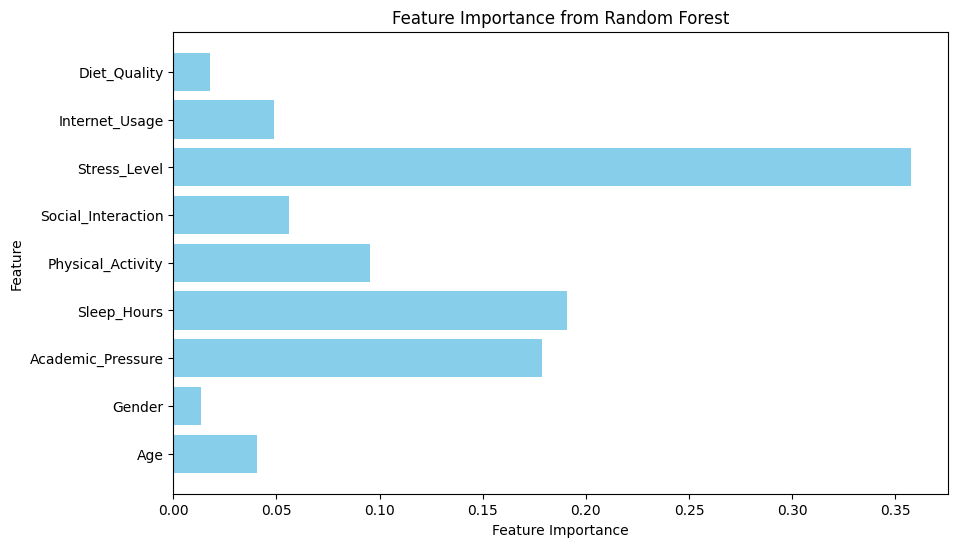

In [ ]:
# Feature Importance
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Calculate accuracy for SVC
svc_accuracy = accuracy_score(y_test, svc_predictions)

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"SVC Accuracy: {svc_accuracy:.2f}")


Random Forest Accuracy: 1.00
SVC Accuracy: 0.88


In [ ]:
from sklearn.metrics import classification_report

# Random Forest Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# SVC Classification Report
print("SVC Classification Report:")
print(classification_report(y_test, svc_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        29

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      0.20      0.33         5
           2       0.88      1.00      0.94        29

    accuracy                           0.88        40
   macro avg       0.90      0.68      0.70        40
weighted avg       0.89      0.88      0.84        40



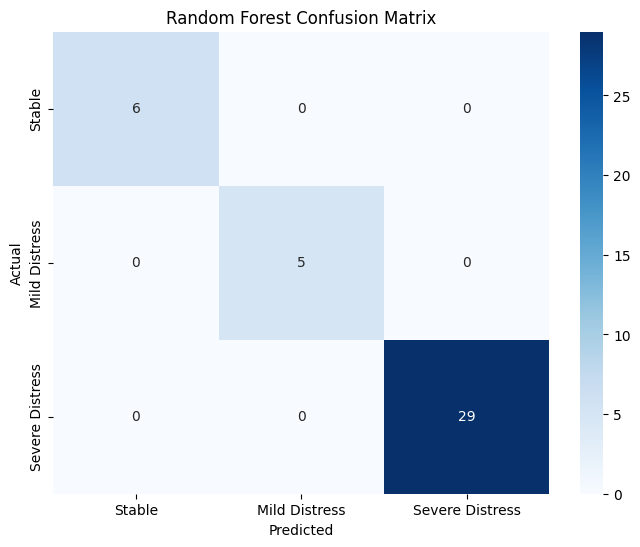

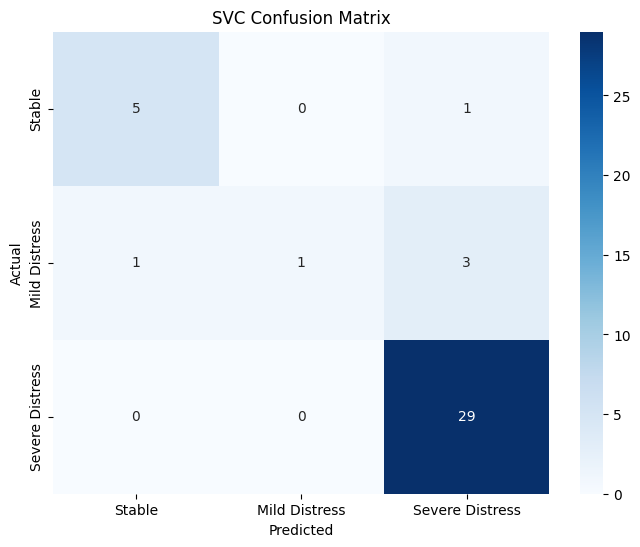

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stable', 'Mild Distress', 'Severe Distress'],
            yticklabels=['Stable', 'Mild Distress', 'Severe Distress'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot Confusion Matrix for SVC
svc_cm = confusion_matrix(y_test, svc_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stable', 'Mild Distress', 'Severe Distress'],
            yticklabels=['Stable', 'Mild Distress', 'Severe Distress'])
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


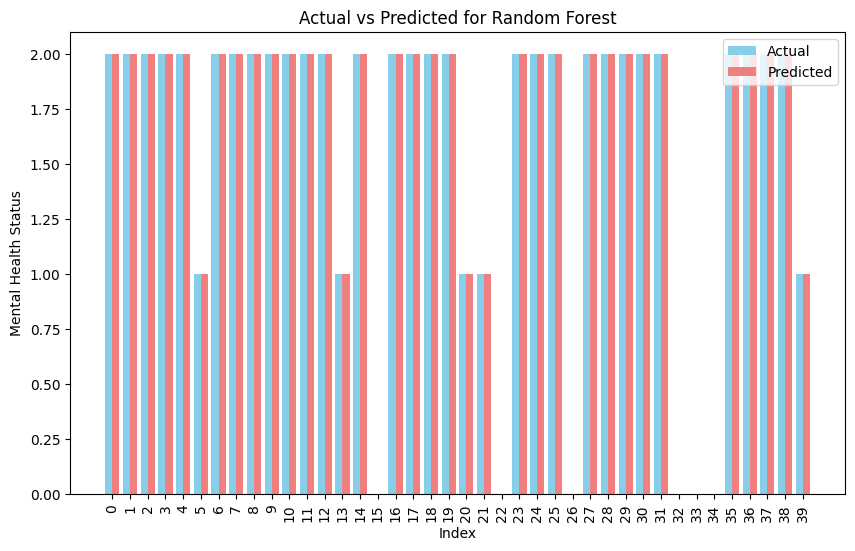

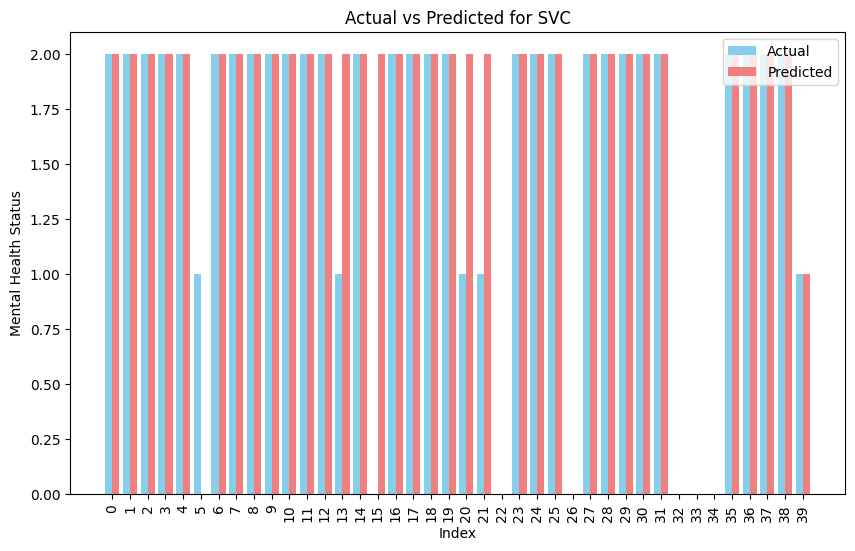

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot Actual vs Predicted values
def plot_actual_vs_predicted(y_test, predictions, model_name):
    plt.figure(figsize=(10, 6))
    x = np.arange(len(y_test))  # Create an index for each data point
    plt.bar(x - 0.2, y_test, width=0.4, label='Actual', color='skyblue')
    plt.bar(x + 0.2, predictions, width=0.4, label='Predicted', color='lightcoral')
    plt.xlabel('Index')
    plt.ylabel('Mental Health Status')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.xticks(x, rotation=90)
    plt.legend()
    plt.show()

# Plot Actual vs Predicted for Random Forest
plot_actual_vs_predicted(y_test, rf_predictions, 'Random Forest')

# Plot Actual vs Predicted for SVC
plot_actual_vs_predicted(y_test, svc_predictions, 'SVC')
